Datasets 1: https://www.kaggle.com/datasets/tunguz/data-on-covid19-coronavirus?select=owid-covid-data.csv

Datasets 2: https://data.worldbank.org/indicator/NY.GDP.PCAP.CD?end=2021&locations=ID&start=2020

In [54]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [55]:
df = pd.read_csv("../datasets/owid-covid-data.csv")
print("shape:", df.shape)
df.head()

shape: (219175, 67)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


Seleksi hanya records yang locationnya adalah Indonesia

In [56]:
df = df[df["location"] == "Indonesia"]
print("shape:", df.shape)
df.head()

shape: (938, 67)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
90986,IDN,Asia,Indonesia,2020-03-02,2.0,2.0,NaN,NaN,NaN,NaN,...,2.8,76.1,64.204,1.04,71.72,0.718,NaN,NaN,NaN,NaN
90987,IDN,Asia,Indonesia,2020-03-03,2.0,0.0,NaN,NaN,NaN,NaN,...,2.8,76.1,64.204,1.04,71.72,0.718,NaN,NaN,NaN,NaN
90988,IDN,Asia,Indonesia,2020-03-04,2.0,0.0,NaN,NaN,NaN,NaN,...,2.8,76.1,64.204,1.04,71.72,0.718,NaN,NaN,NaN,NaN
90989,IDN,Asia,Indonesia,2020-03-05,2.0,0.0,NaN,NaN,NaN,NaN,...,2.8,76.1,64.204,1.04,71.72,0.718,NaN,NaN,NaN,NaN
90990,IDN,Asia,Indonesia,2020-03-06,4.0,2.0,NaN,NaN,NaN,NaN,...,2.8,76.1,64.204,1.04,71.72,0.718,NaN,NaN,NaN,NaN


In [57]:
df = df[['date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_vaccinations']]
print("shape:", df.shape)
df

shape: (938, 6)


,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations
90986,2020-03-02,2.0,2.0,NaN,NaN,NaN
90987,2020-03-03,2.0,0.0,NaN,NaN,NaN
90988,2020-03-04,2.0,0.0,NaN,NaN,NaN
90989,2020-03-05,2.0,0.0,NaN,NaN,NaN
90990,2020-03-06,4.0,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...
91919,2022-09-21,6415328.0,2384.0,157948.0,18.0,NaN
91920,2022-09-22,6417490.0,2162.0,157966.0,18.0,NaN
91921,2022-09-23,6419394.0,1904.0,157986.0,20.0,NaN
91922,2022-09-24,6421118.0,1724.0,157998.0,12.0,NaN


Memasukkan gdp per capita ke dalam dataframe berdasarkan dataset ke 2

In [58]:
gdp_per_capita = []
for i in range(90986, 91924):
    gdp_per_capita.append(np.interp(i, [90986, 91923], [3870.6, 4291.8]))
gdp_per_capita
df['gdp_per_capita'] = gdp_per_capita
df

,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,gdp_per_capita
90986,2020-03-02,2.0,2.0,NaN,NaN,NaN,3870.600000
90987,2020-03-03,2.0,0.0,NaN,NaN,NaN,3871.049520
90988,2020-03-04,2.0,0.0,NaN,NaN,NaN,3871.499039
90989,2020-03-05,2.0,0.0,NaN,NaN,NaN,3871.948559
90990,2020-03-06,4.0,2.0,NaN,NaN,NaN,3872.398079
...,...,...,...,...,...,...,...
91919,2022-09-21,6415328.0,2384.0,157948.0,18.0,NaN,4290.001921
91920,2022-09-22,6417490.0,2162.0,157966.0,18.0,NaN,4290.451441
91921,2022-09-23,6419394.0,1904.0,157986.0,20.0,NaN,4290.900961
91922,2022-09-24,6421118.0,1724.0,157998.0,12.0,NaN,4291.350480


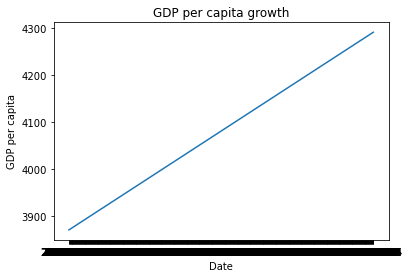

In [63]:
plt.title("GDP per capita growth")
plt.plot(df['date'], df['gdp_per_capita'])
plt.xlabel("Date")
plt.ylabel("GDP per capita")
plt.show()

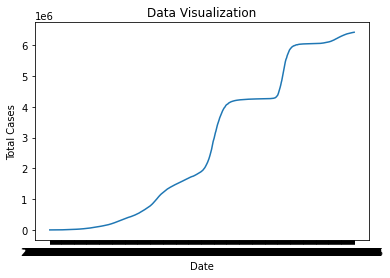

In [66]:
plt.title("Data Visualization")
plt.plot(df['date'], df['total_cases'])
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.show()

In [48]:
df.dropna(inplace=True)
print("shape:", df.shape)
df.head()

shape: (445, 7)


,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,gdp_per_capita
91302,2021-01-12,846765.0,10047.0,24645.0,302.0,0.0,4012.648239
91312,2021-01-22,965283.0,13632.0,27453.0,250.0,132000.0,4017.143436
91314,2021-01-24,989262.0,11788.0,27835.0,171.0,149242.0,4018.042476
91315,2021-01-25,999256.0,9994.0,28132.0,297.0,161959.0,4018.491996
91316,2021-01-26,1012350.0,13094.0,28468.0,336.0,245685.0,4018.941515


In [49]:
df = df.set_index('date')
df

,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,gdp_per_capita
date,,,,,,
2021-01-12,846765.0,10047.0,24645.0,302.0,0.0,4012.648239
2021-01-22,965283.0,13632.0,27453.0,250.0,132000.0,4017.143436
2021-01-24,989262.0,11788.0,27835.0,171.0,149242.0,4018.042476
2021-01-25,999256.0,9994.0,28132.0,297.0,161959.0,4018.491996
2021-01-26,1012350.0,13094.0,28468.0,336.0,245685.0,4018.941515
...,...,...,...,...,...,...
2022-08-09,6255679.0,6276.0,157131.0,18.0,430915083.0,4270.672572
2022-08-17,6297484.0,5253.0,157296.0,19.0,432525181.0,4274.268730
2022-08-28,6346304.0,3228.0,157500.0,7.0,435683139.0,4279.213447


In [50]:
df['Time'] = np.arange(0, len(df.index))
df

,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,gdp_per_capita,Time
date,,,,,,,
2021-01-12,846765.0,10047.0,24645.0,302.0,0.0,4012.648239,0
2021-01-22,965283.0,13632.0,27453.0,250.0,132000.0,4017.143436,1
2021-01-24,989262.0,11788.0,27835.0,171.0,149242.0,4018.042476,2
2021-01-25,999256.0,9994.0,28132.0,297.0,161959.0,4018.491996,3
2021-01-26,1012350.0,13094.0,28468.0,336.0,245685.0,4018.941515,4
...,...,...,...,...,...,...,...
2022-08-09,6255679.0,6276.0,157131.0,18.0,430915083.0,4270.672572,440
2022-08-17,6297484.0,5253.0,157296.0,19.0,432525181.0,4274.268730,441
2022-08-28,6346304.0,3228.0,157500.0,7.0,435683139.0,4279.213447,442


In [51]:
df.corr().style.background_gradient(cmap='coolwarm')

,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,gdp_per_capita,Time
total_cases,1.000000,-0.044995,0.959016,-0.152184,0.946419,0.972779,0.977669
new_cases,-0.044995,1.000000,-0.102985,0.630779,-0.083493,-0.056481,-0.063664
total_deaths,0.959016,-0.102985,1.000000,-0.172860,0.869766,0.908935,0.939918
new_deaths,-0.152184,0.630779,-0.172860,1.000000,-0.341696,-0.244450,-0.233412
total_vaccinations,0.946419,-0.083493,0.869766,-0.341696,1.000000,0.977023,0.965784
gdp_per_capita,0.972779,-0.056481,0.908935,-0.244450,0.977023,1.000000,0.993334
Time,0.977669,-0.063664,0.939918,-0.233412,0.965784,0.993334,1.000000


In [52]:
std_scaller = StandardScaler()
df = pd.DataFrame(std_scaller.fit_transform(df), columns=df.columns, index=df.index)
df

,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,gdp_per_capita,Time
date,,,,,,,
2021-01-12,-1.621410,-0.042183,-1.639876,0.045129,-1.099964,-1.707547,-1.728163
2021-01-22,-1.551439,0.206674,-1.582463,-0.078544,-1.099063,-1.640106,-1.720378
2021-01-24,-1.537283,0.078671,-1.574653,-0.266431,-1.098946,-1.626618,-1.712594
2021-01-25,-1.531382,-0.045862,-1.568580,0.033238,-1.098859,-1.619874,-1.704809
2021-01-26,-1.523652,0.169328,-1.561711,0.125992,-1.098288,-1.613130,-1.697025
...,...,...,...,...,...,...,...
2022-08-09,1.571899,-0.303952,1.068939,-0.630315,1.839352,2.163535,1.697025
2022-08-17,1.596579,-0.374964,1.072312,-0.627937,1.850335,2.217487,1.704809
2022-08-28,1.625402,-0.515532,1.076483,-0.656476,1.871876,2.291672,1.712594


In [53]:
x = df.drop(['gdp_per_capita'], axis=1)
y = df['gdp_per_capita']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)